In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.35, 0.65],
                           class_sep=0.8, random_state=0)
print(X.shape , y.shape)

(5000, 2) (5000,)


In [3]:
df = pd.DataFrame(X, columns = ['f1', 'f2'])
df['target'] = y
print(df.target.value_counts())
df.head()

1    3244
0    1756
Name: target, dtype: int64


,f1,f2,target
0,-0.467337,0.381432,0
1,0.682590,0.099249,1
2,0.743504,0.700580,1
3,0.043891,1.103027,0
4,0.869732,0.988004,1


<AxesSubplot:xlabel='f1', ylabel='f2'>

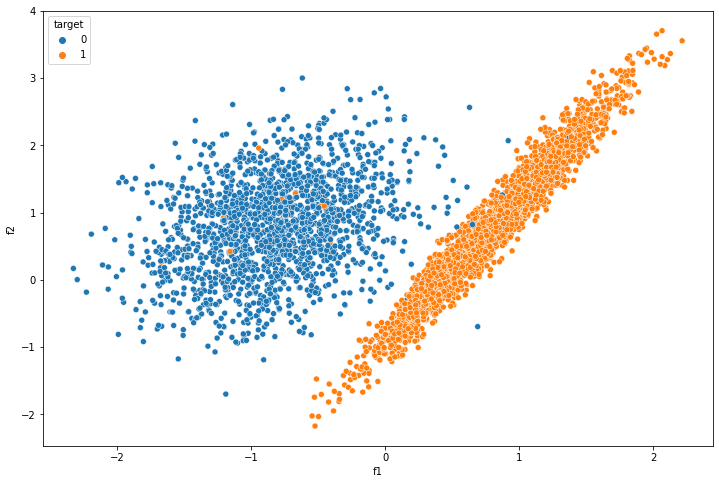

In [4]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'f1', y = 'f2', hue = 'target')

### SMOTETomek

In [7]:
smt = SMOTETomek(tomek = TomekLinks(sampling_strategy = 'majority'), random_state = 10)
X_0_smttm, y_0_smttm = smt.fit_resample(X_0, y_0)

print(len(X_0_smttm), len(y_0_smttm))

13076 13076


In [8]:
smt = SMOTETomek(tomek = TomekLinks(sampling_strategy = 'majority'), random_state = 10)
X_all_smttm, y_all_smttm = smt.fit_resample(X_all, y_all)

print(len(X_all_smttm), len(y_all_smttm))

13101 13101


In [11]:
X_0_smttm['label'] = y_0_smttm

In [14]:
X_0_smttm.to_csv('over_rb_0.csv', index = False)

In [13]:
X_all_smttm['label'] = y_all_smttm
X_all_smttm

,age,mobile,real_estate,employment_type,employment_period,payday,income,NICE_SP,NICE_TIP,NICE_CB_GRD,...,LU0024101,LU0024201,LU0624001,P44003901,PH0000092,PS0000090,PS0000279,PS0000282,PS0000500,label
0,0.470588,0.000000,-0.250000,-1.000000,-0.241379,-0.333333,-0.716509,0.000000,-1.333333,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,-0.235294,0.333333,-1.250000,-1.000000,-0.413793,-0.333333,-0.298546,-0.500000,-0.333333,-1.000000,...,1.000000,0.127000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,0.058824,0.333333,-1.250000,0.000000,0.448276,-0.333333,0.276155,0.000000,-0.333333,-1.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
3,0.294118,0.333333,-0.250000,-1.000000,0.689655,-0.666667,-0.111841,-0.500000,-1.333333,0.000000,...,1.000000,2.000000,0.0,4.278689,0.0,0.0,0.0,0.0,0.0,0
4,0.823529,-1.000000,-1.250000,0.000000,1.034483,-0.333333,0.981016,0.500000,-1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13096,-0.200260,0.333333,-1.186188,0.000000,-0.093923,-0.652486,-0.589474,0.957459,0.028361,-0.085083,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
13097,0.355448,0.063826,-0.239347,-0.808523,-0.393985,-0.063826,1.046642,-0.500000,-0.269508,-1.808523,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
13098,0.889589,0.217666,0.250000,0.000000,0.033828,0.202733,0.268837,1.000000,-0.768666,0.347001,...,4.000000,3.504777,2.0,0.000000,0.0,0.0,0.0,0.0,0.0,1
13099,-0.485381,0.083826,-0.875738,-1.000000,-0.120384,-0.081856,0.389351,0.248523,0.499015,-0.251477,...,0.748523,0.501960,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [15]:
X_all_smttm.to_csv('over_rb_all.csv', index = False)

In [16]:
from sklearn.model_selection import train_test_split

mm_0 = pd.read_csv('over_mm_0.csv')
mm_all = pd.read_csv('over_mm_all.csv')

In [17]:
mm_0_X = mm_0.drop('label', axis = 1)
mm_0_y = mm_0.label
mm_all_X = mm_all.drop('label', axis = 1)
mm_all_y = mm_all.label

In [21]:
train_mm_0_X, test_mm_0_X, train_mm_0_y, test_mm_0_y = train_test_split(mm_0_X, mm_0_y, test_size= 0.2, random_state = 10, stratify= mm_0_y)
print(train_mm_0_X.shape, test_mm_0_X.shape)

(10651, 192) (2663, 192)


In [22]:
train_mm_all_X, test_mm_all_X, train_mm_all_y, test_mm_all_y = train_test_split(mm_all_X, mm_all_y, test_size= 0.2, random_state = 10, stratify= mm_all_y)
print(train_mm_all_X.shape, test_mm_all_X.shape)

(10646, 115) (2662, 115)


In [23]:
mm_0_train = pd.concat([train_mm_0_X, train_mm_0_y], axis = 1)
mm_0_test = pd.concat([test_mm_0_X, test_mm_0_y], axis = 1)

mm_all_train = pd.concat([train_mm_all_X, train_mm_all_y], axis = 1)
mm_all_test = pd.concat([test_mm_all_X, test_mm_all_y], axis = 1)

In [24]:
from sklearn.model_selection import train_test_split

rb_0 = pd.read_csv('over_rb_0.csv')
rb_all = pd.read_csv('over_rb_all.csv')

In [25]:
rb_0_X = rb_0.drop('label', axis = 1)
rb_0_y = rb_0.label
rb_all_X = rb_all.drop('label', axis = 1)
rb_all_y = rb_all.label

In [26]:
train_rb_0_X, test_rb_0_X, train_rb_0_y, test_rb_0_y = train_test_split(rb_0_X, rb_0_y, test_size= 0.2, random_state = 10, stratify= rb_0_y)
print(train_rb_0_X.shape, test_rb_0_X.shape)

(10460, 192) (2616, 192)


In [27]:
train_rb_all_X, test_rb_all_X, train_rb_all_y, test_rb_all_y = train_test_split(rb_all_X, rb_all_y, test_size= 0.2, random_state = 10, stratify= rb_all_y)
print(train_rb_all_X.shape, test_rb_all_X.shape)

(10480, 115) (2621, 115)


In [28]:
rb_0_train = pd.concat([train_rb_0_X, train_rb_0_y], axis = 1)
rb_0_test = pd.concat([test_rb_0_X, test_rb_0_y], axis = 1)

rb_all_train = pd.concat([train_rb_all_X, train_rb_all_y], axis = 1)
rb_all_test = pd.concat([test_rb_all_X, test_rb_all_y], axis = 1)

In [29]:
mm_0_train.to_csv('./data/mm_0_train.csv', index = False)
mm_0_test.to_csv('./data/mm_0_test.csv', index = False)

mm_all_train.to_csv('./data/mm_all_train.csv', index = False)
mm_all_test.to_csv('./data/mm_all_test.csv', index = False)

In [30]:
rb_0_train.to_csv('./data/rb_0_train.csv', index = False)
rb_0_test.to_csv('./data/rb_0_test.csv', index = False)

rb_all_train.to_csv('./data/rb_all_train.csv', index = False)
rb_all_test.to_csv('./data/rb_all_test.csv', index = False)